In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 69s 0us/step


In [3]:
# Visualize dataset
print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)
print("Number of classes: " + str(len(np.unique(y_train))))

x_train.shape (50000, 32, 32, 3)
y_train.shape (50000, 1)
x_test.shape (10000, 32, 32, 3)
y_test.shape (10000, 1)
Number of classes: 10


(32, 32, 3)


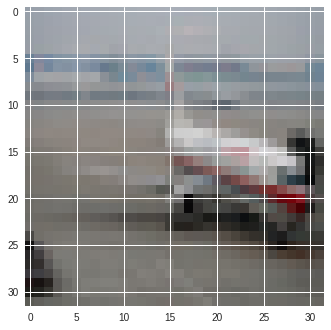

In [4]:
# Visualize some image
import matplotlib.pyplot as plt
print(x_train[99].shape)
plt.imshow(x_train[2962])

In [5]:
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]
print("num_train_samples: ", num_train_samples)
print("num_test_samples: ", num_test_samples)

num_train_samples:  50000
num_test_samples:  10000


In [6]:
# Reshape data
num_classes = 10
y_train_output = keras.utils.to_categorical(y_train, num_classes)
y_test_output = keras.utils.to_categorical(y_test, num_classes)
print("y_train_output.shape: ", y_train_output.shape)
print("y_test_output.shape: ", y_test_output.shape)

y_train_output.shape:  (50000, 10)
y_test_output.shape:  (10000, 10)


In [0]:
# Create convolutional network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
# Parameters for model training
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
model.fit(x_train, y_train_output,
              batch_size=64,
              epochs=20,
              validation_data=(x_test, y_test_output),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 21s 427us/step - loss: 1.6178 - acc: 0.4150 - val_loss: 1.3218 - val_acc: 0.5365
Epoch 2/20
50000/50000 [==============================] - 20s 397us/step - loss: 1.1817 - acc: 0.5815 - val_loss: 1.0178 - val_acc: 0.6311
Epoch 3/20
50000/50000 [==============================] - 20s 392us/step - loss: 1.0042 - acc: 0.6490 - val_loss: 1.3851 - val_acc: 0.4989
Epoch 4/20
50000/50000 [==============================] - 19s 388us/step - loss: 0.9021 - acc: 0.6858 - val_loss: 0.8493 - val_acc: 0.7087
Epoch 5/20
50000/50000 [==============================] - 19s 389us/step - loss: 0.8374 - acc: 0.7102 - val_loss: 0.7824 - val_acc: 0.7352
Epoch 6/20
50000/50000 [==============================] - 19s 387us/step - loss: 0.7981 - acc: 0.7250 - val_loss: 0.8364 - val_acc: 0.7172
Epoch 7/20
50000/50000 [==============================] - 19s 383us/step - loss: 0.7773 - acc: 0.7362 - val_loss: 1.